In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import datasets


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


In [4]:
### Checking the shape of train & test dataset

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
classes[9]

'truck'

In [7]:
print('Training labels:')
for label in y_train[:10]:
    print(classes[label[0]])

print('Testing labels:')
for label in y_test[:10]:
    print(classes[label[0]])


Training labels:
frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat
Testing labels:
cat
ship
ship
airplane
frog
frog
automobile
frog
cat
automobile


**Checking all imaged with labels**

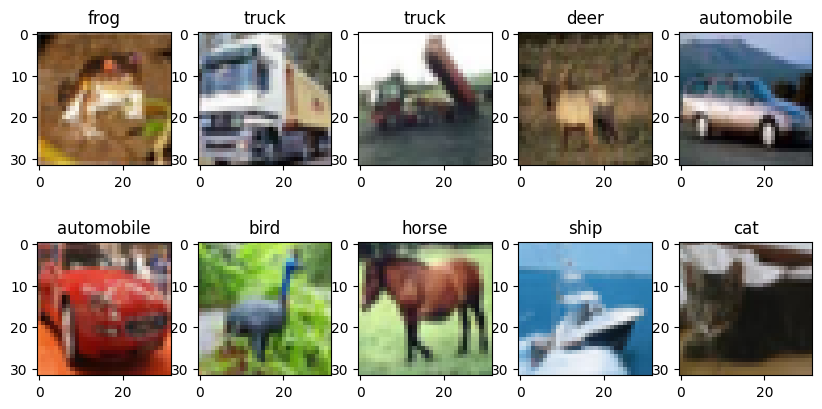

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2,5,i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
plt.show()


In [9]:
### Normalizing the dataset

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [10]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [11]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [12]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [13]:
### Importing Required Libraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


**Creating a CNN Model **

In [14]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0

In [16]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [17]:
### Applying early stopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/100
1563/1563 [==============================] - 30s 10ms/step - loss: 1.9184 - accuracy: 0.3008 - val_loss: 1.6378 - val_accuracy: 0.4169
Epoch 2/100
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5898 - accuracy: 0.4168 - val_loss: 1.6408 - val_accuracy: 0.4074
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4877 - accuracy: 0.4612 - val_loss: 1.6757 - val_accuracy: 0.4174
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4171 - accuracy: 0.4910 - val_loss: 1.2467 - val_accuracy: 0.5386
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3651 - accuracy: 0.5146 - val_loss: 1.1823 - val_accuracy: 0.5799
Epoch 6/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3264 - accuracy: 0.5295 - val_loss: 1.1178 - val_accuracy: 0.5943
Epoch 7/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2908 - accuracy: 0.5432 - val_loss: 1.2698 

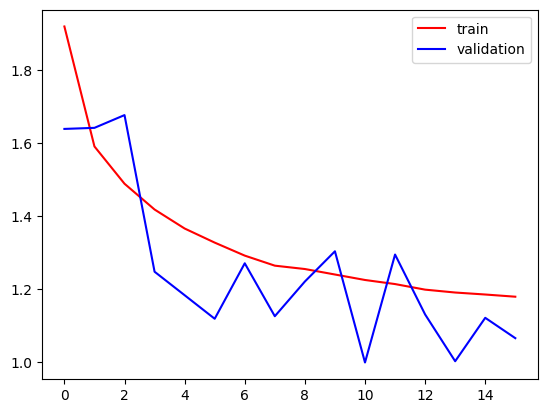

In [ ]:
### Checking the loss


plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

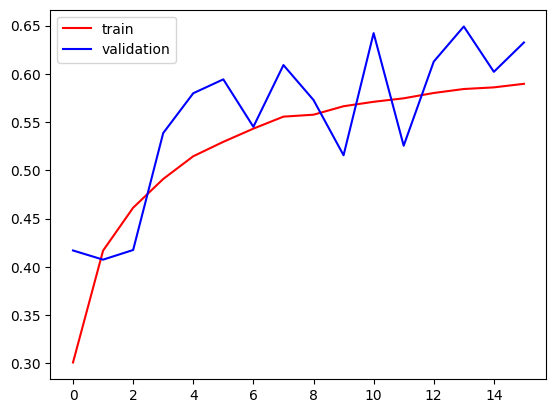

In [ ]:
### Checking the loss


plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


**Not getting good accuracy ,,, so trying TRANSFER LEARNING FINE TUNING model to train the data**

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

conv_base.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

**Freezing VGG16 model for better performance**

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)


input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model1 = Sequential()

model1.add(conv_base)

model1.add(Flatten())

model1.add(Dense(256, activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Dense(10, activation='softmax'))


model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history1 = model1.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/100
1563/1563 [==============================] - 31s 17ms/step - loss: 1.1253 - accuracy: 0.6148 - val_loss: 0.9789 - val_accuracy: 0.6719
Epoch 2/100
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8772 - accuracy: 0.7030 - val_loss: 0.8858 - val_accuracy: 0.7091
Epoch 3/100
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7788 - accuracy: 0.7367 - val_loss: 0.8098 - val_accuracy: 0.7220
Epoch 4/100
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6975 - accuracy: 0.7653 - val_loss: 0.8377 - val_accuracy: 0.7122
Epoch 5/100
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6281 - accuracy: 0.7871 - val_loss: 0.8115 - val_accuracy: 0.7274
Epoch 6/100
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5669 - accuracy: 0.8063 - val_loss: 0.8341 - val_accuracy: 0.7417
Epoch 7/100
1563/1563 [==============================] - 26s 17ms/step - loss: 0.4937 - accuracy: 0.8337 - val_loss: 0